In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../python')
from functions import *
from models import *
import tensorflow as tf
from livelossplot import PlotLossesKeras
os.environ["CUDA_VISIBLE_DEVICES"] = "2" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-02-09 15:25:08.095379: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-02-09 15:25:09.132327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA A40 computeCapability: 8.6
coreClock: 1.74GHz coreCount: 84 deviceMemorySize: 44.56GiB deviceMemoryBandwidth: 648.29GiB/s
2022-02-09 15:25:09.132748: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-02-09 15:25:09.134713: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-02-09 15:25:09.136743: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-02-09 15:25:09.137164: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-0

In [3]:
stream = "gd1_tail"

In [4]:
df, file = load_file(stream = stream)

### Prepare datasets for training

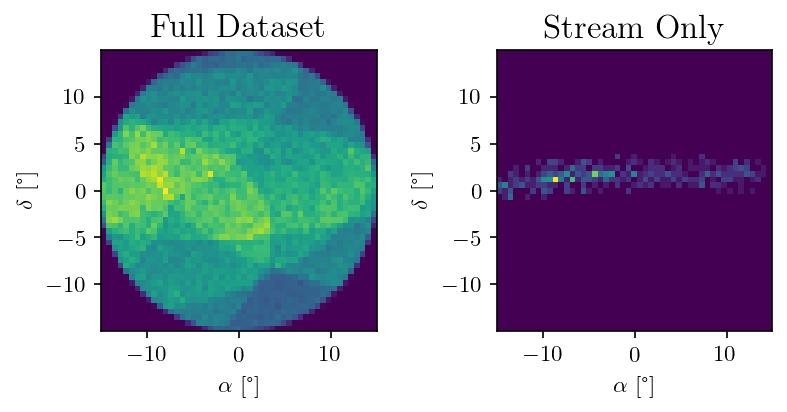

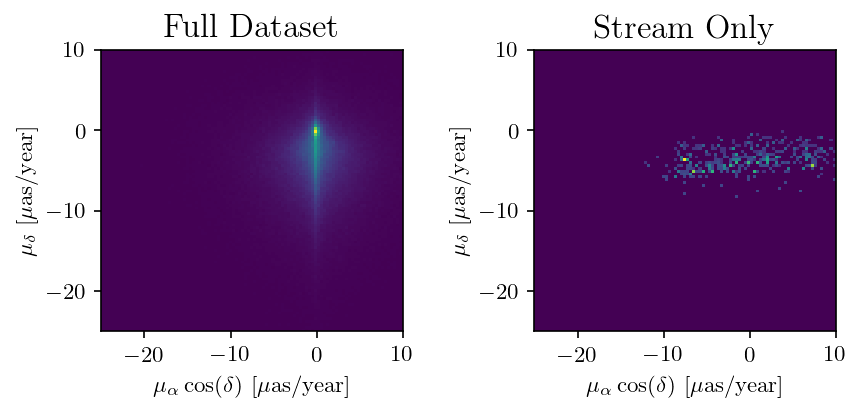

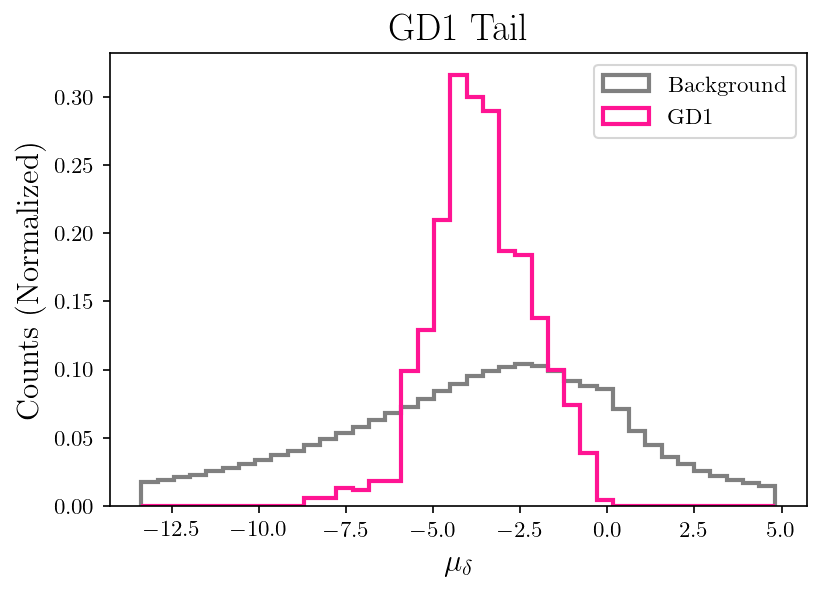

In [5]:
visualize_stream(df)

Sideband region: [-7.0,-3.0]
Signal region: [-6.0,-3.1]
Total counts: SR = 613,810, SB = 181,912


/clusterfs/ml4hep/mpettee/GaiaCWoLa/notebooks/../python/functions.py:242: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slice['label'] = np.where(((df_slice.μ_δ > sr_min) & (df_slice.μ_δ < sr_max)), 1, 0)
No handles with labels found to put in legend.


Signal region has 1,565 stream and 612,245 bkg events (0.26%).
Sideband region has 94 stream and 181,818 bkg events (0.05%).
f_sig = 4.9X f_sideband.


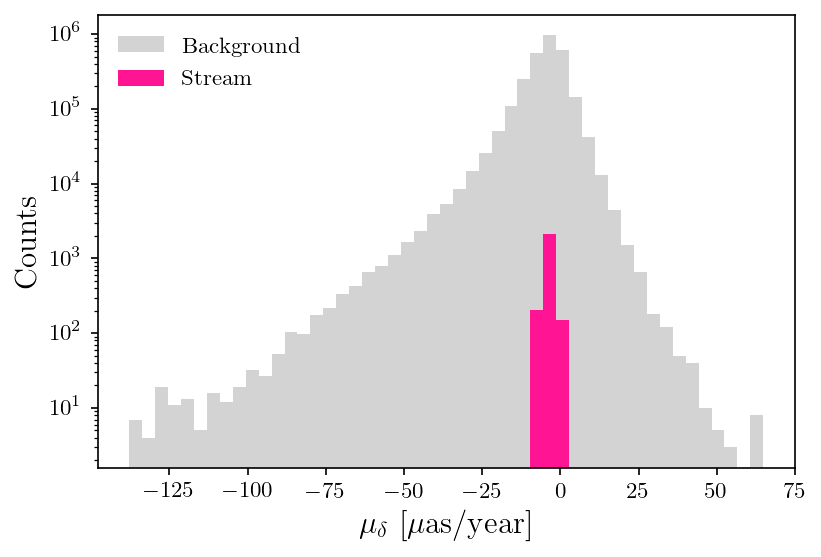

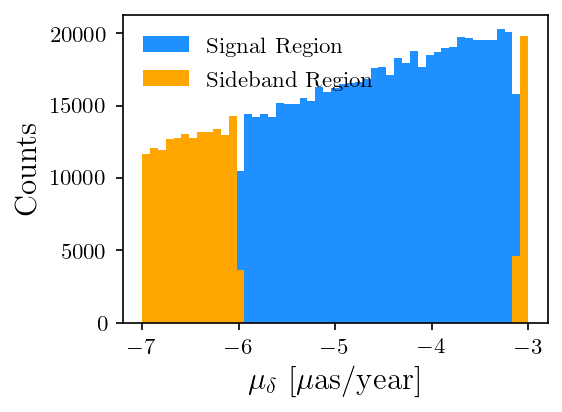

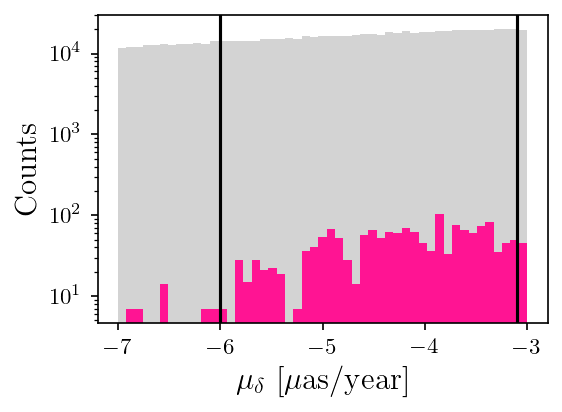

In [6]:
df = signal_sideband(df, stream = stream)

# Train

In [7]:
tf.keras.backend.clear_session()

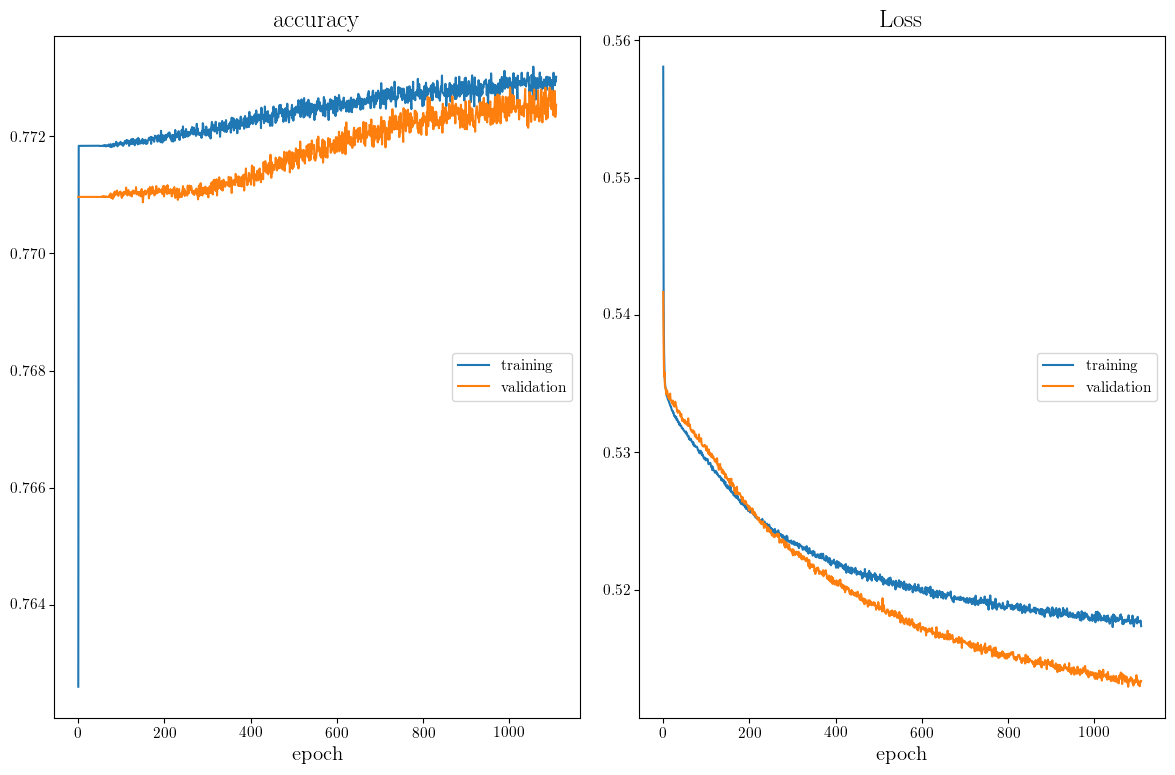

accuracy
	training         	 (min:    0.763, max:    0.773, cur:    0.773)
	validation       	 (min:    0.771, max:    0.773, cur:    0.773)
Loss
	training         	 (min:    0.517, max:    0.558, cur:    0.517)
	validation       	 (min:    0.513, max:    0.542, cur:    0.513)
Best losses: [0.5172892808914185]
Loading weights from best loop, i.e. loop #0.
AUC: 0.648
Maximum purity of 11.5% at 0.51%
Top 10 stars: Purity = 10.0% 
Top 20 stars: Purity = 5.0% 
Top 50 stars: Purity = 24.0% 
Top 100 stars: Purity = 25.0% 


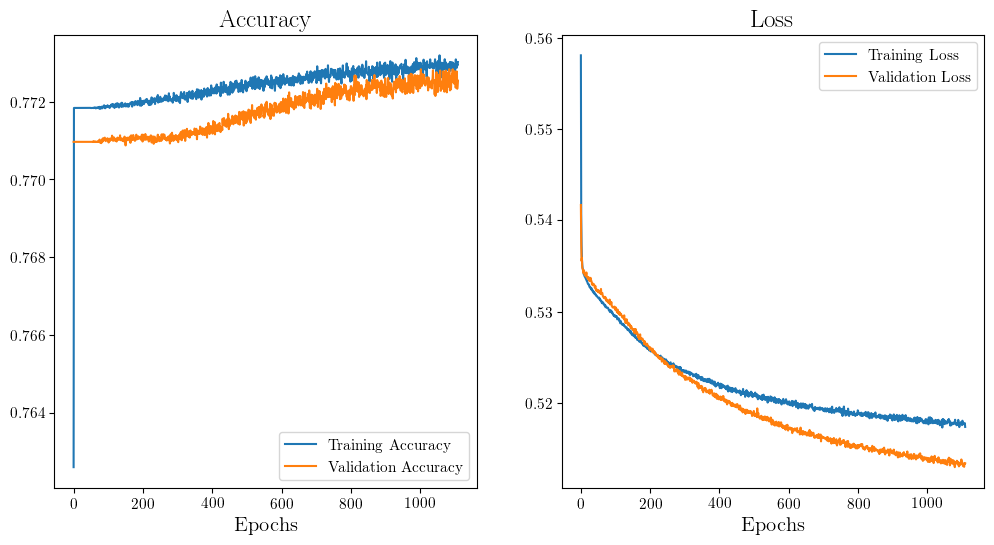

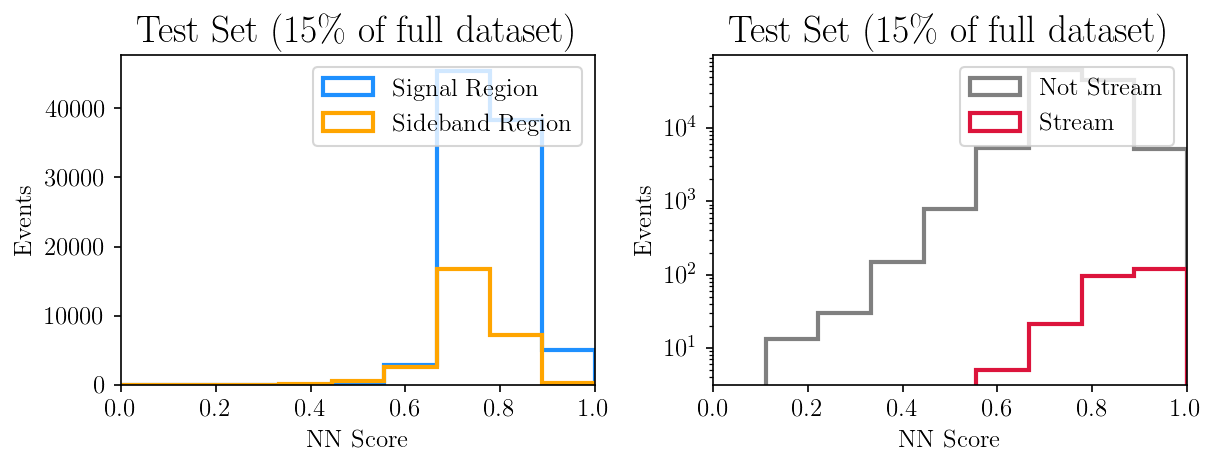

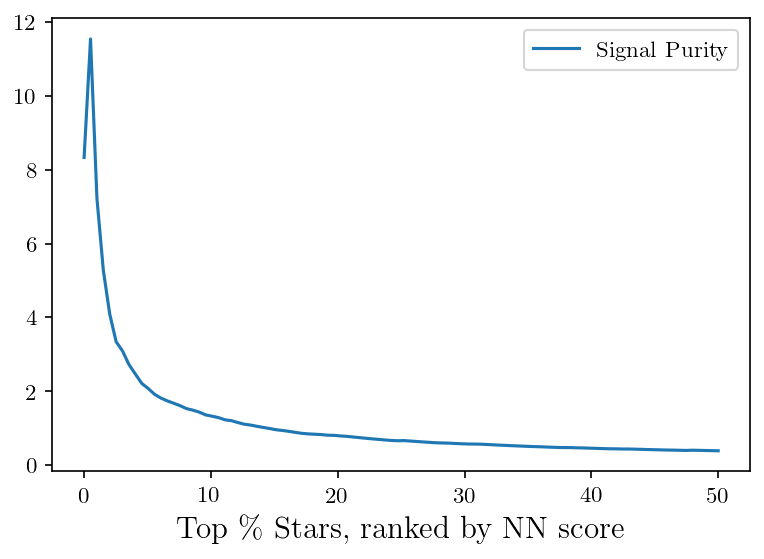

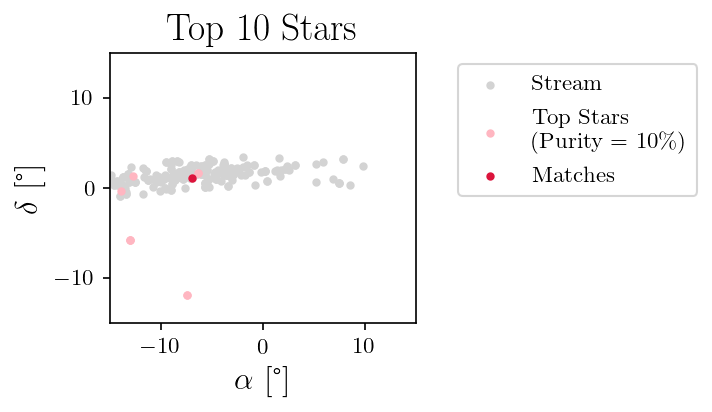

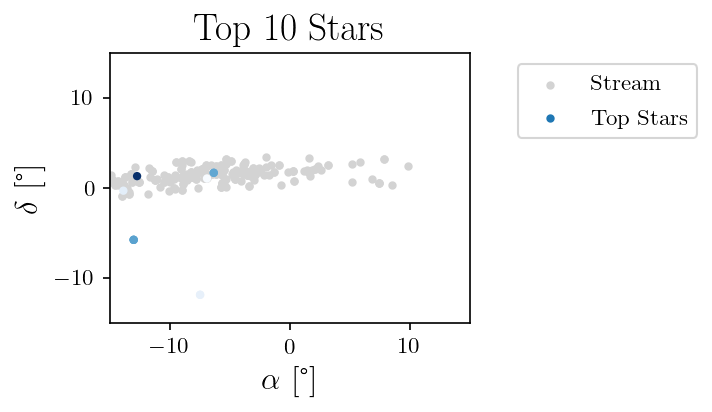

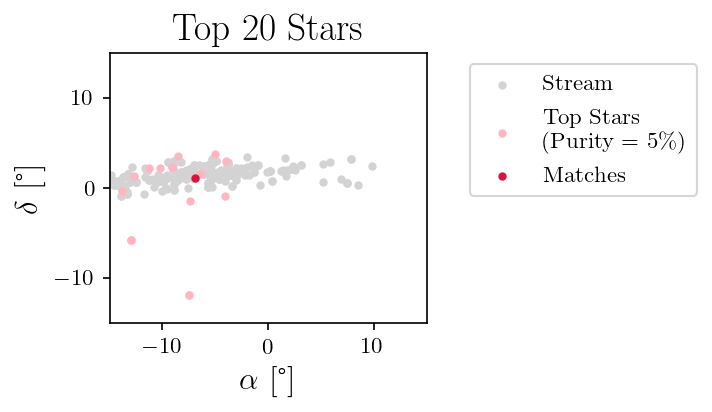

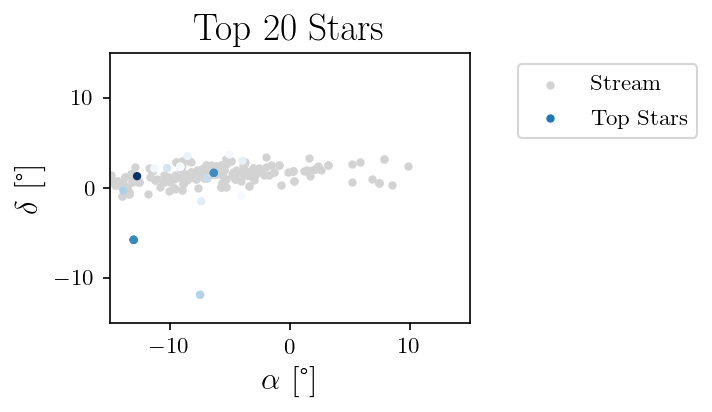

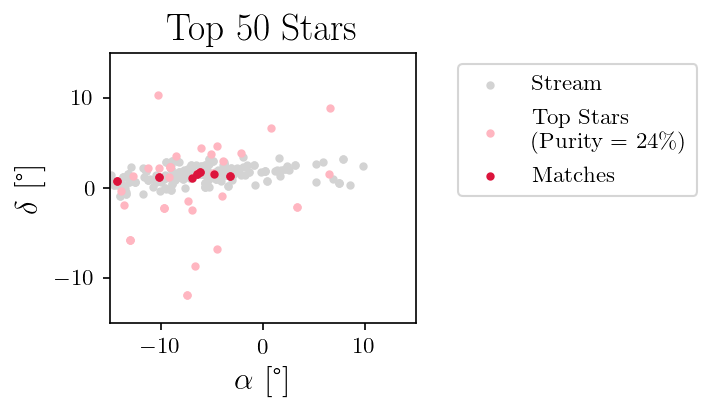

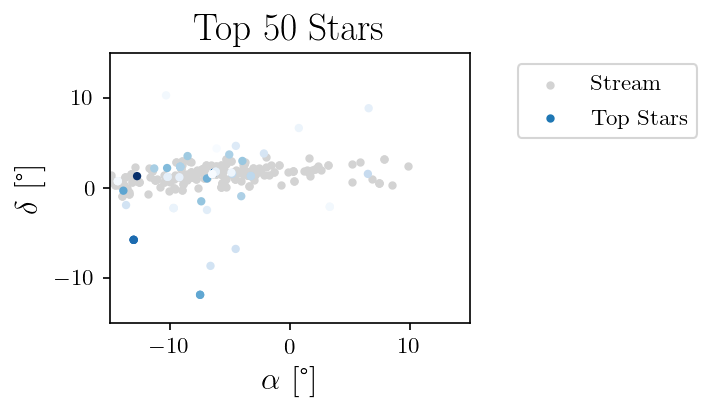

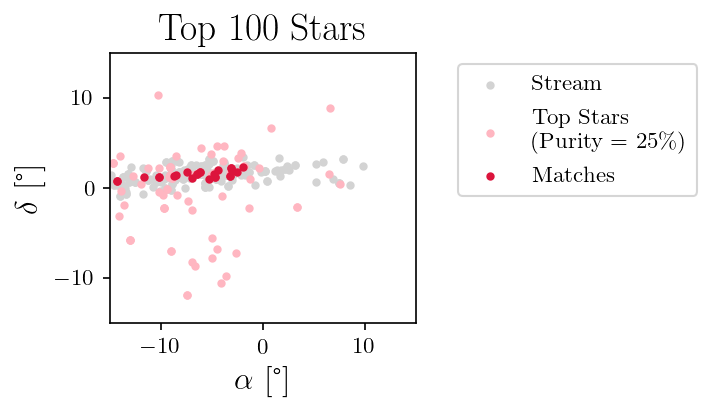

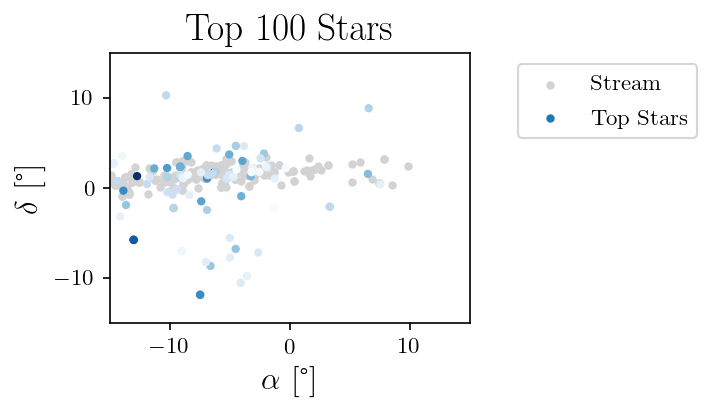

In [8]:
test = train(df, 
      n_folds = 1, 
      best_of_n_loops = 1,
      layer_size = 128, 
      batch_size = 10000, 
      dropout = 0.2, 
      epochs = 2000, 
      patience = 30)